<a href="https://colab.research.google.com/github/iqbalalghifary/Machine_Learning/blob/main/Test_SVG_Image_Classification_Huawei_Certif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ShanmukhVegi/Image-Classification.git

Cloning into 'Image-Classification'...
remote: Enumerating objects: 116, done.
remote: Total 116 (delta 0), reused 0 (delta 0), pack-reused 116
Receiving objects: 100% (116/116), 17.16 MiB | 25.88 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
!ls Image-Classification/

 Cars		'Ice cream cone'   Shanmukh_Classification.ipynb
'Cricket ball'	 README.md


In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [ ]:
!ls 'Image-Classification/Ice cream cone'

 02wmt-articleLarge-v3.jpg
'220px-Strawberry_ice_cream_cone_(5076899310).jpg'
 40194016_1-vadilal-flingo-ice-cream-cone-nutty-butter-scotch.jpg
 59920482-chocolate-ice-cream-cone-isolated.jpg
 All-Time-Favourite---Soya-Ice-Cream-Cone-compressor.jpg
 big-cone-ice-cream-500x500.jpg
 black-cone-7.jpg
 Butterscotch-Cone-Ice-Cream.jpg
 chocolate-ice-cream-cone-blue-faded-pastel-color-background-chocolate-ice-cream-cone-blue-faded-pastel-color-background-hand-109789561.jpg
 chocolate-ice-cream-cone-duckycards.jpg
 depositphotos_15875059-stock-photo-ice-cream.jpg
 havmor-magic-ice-cream-cones-500x500.jpg
 IceCreamCone13.jpg
 ice-cream-cone-cupcakes-4-735x1101.jpg
 ice_cream_cone_fancy2.jpg
 ice-cream-cone-on-pink-background-kevinruss.jpg
'images (1).jfif'
'images (2).jfif'
'images (3).jfif'
'images (4).jfif'
'images (5).jfif'
'images (6).jfif'
 images.jfif
 istockphoto-583839158-612x612.jpg
 maxresdefault.jpg
 melting-strawberry-ice-cream-cone-kevinruss.jpg
 Mini-Frozen-Treat-Pops1.jpg
 mini-

In [ ]:
!ls Image-Classification/Ice cream cone'

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [ ]:
Categories=['Cars','Ice cream cone','Cricket ball']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball
y
Enter How Many types of Images do you want to classify
3
please enter 3 names
Cars
Ice cream cone
Cricket ball
If not drive Please upload all the 3 category images in google collab with the same names as given in categories


In [ ]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='Image-Classification'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.184641,0.170915,0.162092,0.263725,0.237255,0.174510,0.286275,0.243137,0.173203,0.286275,0.235294,0.184314,0.274510,0.229412,0.188235,0.211111,0.191503,0.176471,0.204248,0.184641,0.172876,0.211765,0.192157,0.170588,0.211765,0.192157,0.168627,0.207843,0.192157,0.168627,0.159804,0.155882,0.143137,0.137255,0.147386,0.143464,0.160131,0.162418,0.156536,0.156863,...,0.592157,0.596078,0.615686,0.611111,0.615033,0.634641,0.607843,0.611765,0.621569,0.596405,0.600327,0.608170,0.607516,0.611438,0.619281,0.607843,0.611765,0.619608,0.598039,0.601961,0.609804,0.609804,0.609804,0.617647,0.608824,0.608824,0.616667,0.595425,0.597712,0.605556,0.592157,0.596078,0.603922,0.601961,0.605882,0.615686,0.583660,0.587582,0.607190,0
1,0.492105,0.601908,0.637203,0.499948,0.601908,0.637203,0.507791,0.601908,0.641124,0.507791,0.601908,0.641124,0.507791,0.601908,0.641124,0.511712,0.605830,0.645046,0.511712,0.605830,0.645046,0.511712,0.605830,0.645046,0.510758,0.604876,0.644092,0.501856,0.595974,0.635190,0.496928,0.591046,0.631268,0.484157,0.578275,0.623425,0.476314,0.570431,0.615582,0.478327,...,0.489190,0.391150,0.268627,0.497033,0.395072,0.274510,0.505882,0.400954,0.282353,0.507791,0.403922,0.278431,0.507791,0.403922,0.278431,0.508797,0.404928,0.276471,0.509804,0.407843,0.278431,0.513725,0.407843,0.282353,0.513725,0.411765,0.282353,0.521569,0.415686,0.286275,0.525490,0.415686,0.288288,0.519660,0.415686,0.290196,0.517647,0.411765,0.290196,0
2,0.038902,0.036261,0.041542,0.055896,0.062380,0.061085,0.043841,0.056535,0.053973,0.047558,0.063962,0.054565,0.055657,0.069984,0.058298,0.068915,0.083242,0.072837,0.079399,0.092444,0.085292,0.057229,0.074196,0.054363,0.063712,0.084601,0.050876,0.065239,0.084977,0.061317,0.071608,0.089856,0.068147,0.061176,0.076784,0.058536,0.069020,0.083721,0.064619,0.040828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']} #Training akan menghasilkan model
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train) #proses training
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
y_pred=model.predict(x_test) #proses predict menggunakn data test (20%)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 1, 1])

In [ ]:
print("The actual data is:") #ga sesuai sama yg diatas
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [ ]:
classification_report(y_pred,y_test)
#print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.82         9\n           1       1.00      0.86      0.92         7\n           2       0.50      0.75      0.60         4\n\n    accuracy                           0.80        20\n   macro avg       0.79      0.79      0.78        20\nweighted avg       0.84      0.80      0.81        20\n'

In [ ]:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       1.00      0.86      0.92         7
           2       0.50      0.75      0.60         4

    accuracy                           0.80        20
   macro avg       0.79      0.79      0.78        20
weighted avg       0.84      0.80      0.81        20


In [ ]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


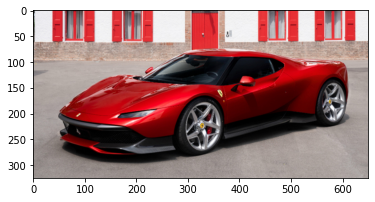

Cars = 85.65328118843082%
Ice cream cone = 5.353835693951184%
Cricket ball = 8.992883117617994%
The predicted image is : Cars
Is the image a Cars ?(y/n)
y
Thank you for your feedback


In [ ]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3)) #kudu sesuai si parameter nya, mksdnya yg 150, 150, 3 sama yang diatas
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")